# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Fachry Syifa Ananda
- **Email:** m010d4ky2528@bangkit.academy
- **ID Dicoding:** fachry_syifa_ananda

## Menentukan Pertanyaan Bisnis

- Apakah ada hubungan waktu dengan jumlah penyewa sepeda?
- Pada bulan apa jumlah penyewa sepeda tertinggi dan terendah?
- Apakah musim memengaruhi jumlah penyewa sepeda?
- Apakah terjadi peningkatan atau penurunan jumlah penyewa sepeda antara tahun 2011 dan 2012?
- Bagaimana kondisi jumlah penyewa sepeda pada weekday?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Wrangling

### Gathering Data

Pada tahap ini saya mengumpulkan data yang sudah diberikan, saya memilih Bike Sharing Dataset maka kita akan mengimpor file day.csv dan hour.csv

#### **Membaca table day**

In [6]:
day_df = pd.read_csv('https://raw.githubusercontent.com/fachrysnan/Bike-sharing-dataset/main/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### **Membaca table hour**

In [7]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/fachrysnan/Bike-sharing-dataset/main/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### **Menilai day_df**

**1. Mengecek tipe data**

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**2. Mengecek missing value**

In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Dari tabel diatas tidak ada missing value, sehingga tidak perlu diperbaiki

**3. Mengecek data yang duplikat**

In [10]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


- Setelah diketahui bahwa tidak ada data yang terduplikat maka dapat disimpulkan semua data bersifat unik

**4. Mengecek semua data statistiknya**

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- dapat dilihat bahwa data masih sesuai dan tidak ada error

#### **Menilai day_df**

**1. Mengecek tipe data hour_df**

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**2. Mengecek missing value**

In [13]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Dari tabel diatas tidak ada missing value, sehingga tidak perlu diperbaiki.

**3. Mengecek data yang duplikat**

In [14]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


- Setelah diketahui bahwa tidak ada data yang terduplikat maka dapat disimpulkan semua data bersifat unik.

**4. Mengecek semua data statistiknya**

In [15]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- dapat dilihat bahwa data masih sesuai dan tidak ada error.

### Cleaning Data

**1. Menghapus tabel yang tidak dibutuhkan**

Menurut saya tabel "hour" tidak begitu diperlukan karena tabel "hour" sudah mencakup tabel "day" secara lebih lengkap yaitu disertai kolom jam sedangkan di tabel "day" tidak terdapat tabel tersebut, ini juga dapat menyingkat analisis data untuk Bike Sharing ini.

In [16]:
del day_df

**2. Mengubah detail dari kolom agar lebih mudah dimengerti**

In [17]:
#mengubah judul kolom

hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr' : 'hour',
    'weathersit': 'weathercond',
    'cnt': 'count'
}, inplace=True)

hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathercond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
#mengubah angka-angka menjadi keterangan nama

hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

hour_df['year'] = hour_df['year'].map({
    0: 2011, 1: 2012
})

hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weathercond'] = hour_df['weathercond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [19]:
# Mengubah tipe data ke datetime
hour_df['dateday'] = pd.to_datetime(hour_df.dateday).dt.date

# Mengubaha tipe data ke categorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathercond'] = hour_df.weathercond.astype('category')

In [20]:
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathercond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   instant      17379 non-null  int64   
 1   dateday      17379 non-null  object  
 2   season       17379 non-null  category
 3   year         17379 non-null  category
 4   month        17379 non-null  category
 5   hour         17379 non-null  category
 6   holiday      17379 non-null  category
 7   weekday      17379 non-null  category
 8   workingday   17379 non-null  category
 9   weathercond  17379 non-null  category
 10  temp         17379 non-null  float64 
 11  atemp        17379 non-null  float64 
 12  hum          17379 non-null  float64 
 13  windspeed    17379 non-null  float64 
 14  casual       17379 non-null  int64   
 15  registered   17379 non-null  int64   
 16  count        17379 non-null  int64   
dtypes: category(8), float64(4), int64(4), object(1)
memory usage: 1.3+ MB

In [22]:
hour_df.sample(10)

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weathercond,temp,atemp,hum,windspeed,casual,registered,count
6226,6227,2011-09-22,Fall,2011,Sep,0,0,Thu,1,Clear/Partly Cloudy,0.60,0.5152,0.94,0.1045,11,30,41
643,644,2011-01-30,Spring,2011,Jan,2,0,Sun,0,Clear/Partly Cloudy,0.16,0.2273,0.80,0.0000,1,10,11
16132,16133,2012-11-09,Winter,2012,Nov,22,0,Fri,1,Clear/Partly Cloudy,0.34,0.3485,0.71,0.1045,17,146,163
14032,14033,2012-08-12,Fall,2012,Aug,21,0,Sun,0,Clear/Partly Cloudy,0.72,0.6667,0.51,0.0896,78,142,220
2920,2921,2011-05-06,Summer,2011,May,14,0,Fri,1,Clear/Partly Cloudy,0.60,0.6212,0.40,0.4478,86,127,213
8695,8696,2012-01-03,Spring,2012,Jan,3,0,Tue,1,Clear/Partly Cloudy,0.16,0.1364,0.55,0.2836,0,2,2
14657,14658,2012-09-07,Fall,2012,Sep,22,0,Fri,1,Clear/Partly Cloudy,0.70,0.6667,0.74,0.2239,52,247,299
1059,1060,2011-02-16,Spring,2011,Feb,21,0,Wed,1,Clear/Partly Cloudy,0.36,0.3485,0.46,0.1940,5,87,92
3867,3868,2011-06-15,Summer,2011,Jun,1,0,Wed,1,Clear/Partly Cloudy,0.54,0.5152,0.64,0.2836,0,14,14
14079,14080,2012-08-14,Fall,2012,Aug,20,0,Tue,1,Clear/Partly Cloudy,0.74,0.7121,0.74,0.2239,65,371,436


## Exploratory Data Analysis (EDA)

**Eksplorasi data hour_df**

**1. Kelompokkan penyewa sepeda berdasarkan jam**

In [23]:
result = hour_df.groupby(by='hour').agg({
    'count': ['max', 'min', 'mean', 'sum']
})
result_sorted = result.sort_values(by=('count', 'sum'), ascending=False)
print(result_sorted)

     count                        
       max min        mean     sum
hour                              
17     976  15  461.452055  336860
18     977  23  425.510989  309772
8      839   5  359.011004  261001
16     783  11  311.983562  227748
19     743  11  311.523352  226789
13     760  11  253.661180  184919
12     776   3  253.315934  184414
15     750   7  251.233196  183149
14     750  12  240.949246  175652
20     567  11  226.030220  164550
9      426  14  219.309491  159438
7      596   1  212.064649  154171
11     663  10  208.143054  151320
10     539   8  173.668501  126257
21     584   6  172.314560  125445
22     502   9  131.335165   95612
23     256   2   87.831044   63941
6      213   1   76.044138   55132
0      283   2   53.898072   39130
1      168   1   33.375691   24164
2      132   1   22.869930   16352
5       66   1   19.889819   14261
3       79   1   11.727403    8174
4       28   1    6.352941    4428


Dapat dilihat bahwa jam 17.00 merupakan rata rata dan jumlah terbanyak dan jam 04.00 merupakan rata rata dan jumlah terendah dalam bike sharing.

**2. Kelompokkan penyewa sepeda berdasarkan bulan**

In [24]:
result = hour_df.groupby(by='month').agg({
    'count': ['max', 'mean', 'sum']
})
result_sorted = result.sort_values(by=('count', 'sum'), ascending=False)
print(result_sorted)

      count                    
        max        mean     sum
month                          
Aug     941  238.097627  351194
Jun     900  240.515278  346342
Sep     977  240.773138  345991
Jul     913  231.819892  344948
May     873  222.907258  331686
Oct     963  222.158511  322352
Apr     822  187.260960  269094
Nov     729  177.335421  254831
Mar     957  155.410726  228920
Dec     759  142.303439  211036
Feb     610  112.865026  151352
Jan     559   94.424773  134933


Dapat dilihat bahwa bulan Agustus merupakan rata rata dan jumlah terbanyak dan bulan Januari merupakan rata rata dan jumlah terendah dalam bike sharing.

**3. Kelompokkan penyewa sepeda berdasarkan musim**

In [25]:
result = hour_df.groupby(by='season').agg({
    'count': ['max', 'mean', 'sum']
})
result_sorted = result.sort_values(by=('count', 'sum'), ascending=False)
print(result_sorted)

       count                     
         max        mean      sum
season                           
Fall     977  236.016237  1061129
Summer   957  208.344069   918589
Winter   967  198.868856   841613
Spring   801  111.114569   471348


Berdasarkan data diatas, para penyewa sepeda, jumlah penyewa tertinggi pada musim gugur (Fall), dapat dilihat dari rata-ratanya. Sedangkan yang paling sedikit adalah pada musim semi (Spring) dengan rata-rata terkecil.

**4. Bandingkan penyewa sepeda pada saat weekday dan weekend**

In [26]:
result = hour_df.groupby(by='weekday').agg({
    'count':['max','mean', 'sum']
})
result_sorted = result.sort_values(by=('count', 'sum'), ascending=False)
print(result_sorted)

        count                    
          max        mean     sum
weekday                          
Fri       957  196.135907  487790
Thu       976  196.436665  485395
Sat       783  190.209793  477807
Wed       977  191.130505  473048
Tue       970  191.238891  469109
Mon       968  183.744655  455503
Sun       776  177.468825  444027


berdasarkan jumlah penyewa hari yang paling banyak adalah jumat dan terendah adalah minggu.

**5. Bandingkan penyewa sepeda berdasarkan kondisi cuaca**

In [27]:
result = hour_df.groupby(by='weathercond').agg({
    'count': ['max', 'mean', 'sum']
})
result_sorted = result.sort_values(by=('count', 'sum'), ascending=False)
print(result_sorted)

                    count                     
                      max        mean      sum
weathercond                                   
Clear/Partly Cloudy   977  204.869272  2338173
Misty/Cloudy          957  175.165493   795952
Light Snow/Rain       891  111.579281   158331
Severe Weather        164   74.333333      223


Dapat dilihat bahwa penyewa sepeda sesuai dengan kondisi cuaca dengan cuaca cerah dan berawan jumlah terbanyak penyewa sedangkan pada cuaca buruk meskipun ada yang menyewa tetapi tetap menjadi terendah.

**6. Bandingkan temperature, humidity, dan kecepatan angin berdasarkan musim**

In [28]:
result = hour_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
})
result_sorted = result.sort_values(by=('temp', 'mean'), ascending=False)
print(result_sorted)

result2 = hour_df.groupby(by='season').agg({
    'hum': ['max', 'min', 'mean'],
})
result2_sorted = result2.sort_values(by=('hum', 'mean'), ascending=False)
print(result2_sorted) 

result3 = hour_df.groupby(by='season').agg({
    'atemp': ['max', 'min', 'mean'],
})
result3_sorted = result3.sort_values(by=('atemp', 'mean'), ascending=False)
print(result3_sorted) 

result4 = hour_df.groupby(by='season').agg({
    'windspeed': ['max', 'min', 'mean'],
})
result4_sorted = result4.sort_values(by=('windspeed', 'mean'), ascending=False)
print(result4_sorted) 

        temp                
         max   min      mean
season                      
Fall    1.00  0.38  0.706410
Summer  0.94  0.16  0.544663
Winter  0.76  0.14  0.423138
Spring  0.72  0.02  0.299147
        hum                
        max   min      mean
season                     
Winter  1.0  0.16  0.667124
Fall    1.0  0.16  0.633167
Summer  1.0  0.16  0.627022
Spring  1.0  0.00  0.581348
         atemp                  
           max     min      mean
season                          
Fall    1.0000  0.2424  0.656004
Summer  0.8788  0.1667  0.520547
Winter  0.6818  0.1515  0.415738
Spring  0.6515  0.0000  0.298116
       windspeed               
             max  min      mean
season                         
Spring    0.8060  0.0  0.215107
Summer    0.7164  0.0  0.203410
Fall      0.8507  0.0  0.171593
Winter    0.6418  0.0  0.170819


- Dari data diatas dapat disimpulkan suhu dan suhu yang dirasakan tertinggi terjadi pada musim gugur(fall) dan suhu terendah pada musim semi(spring)
- Sedangkan tingkat kelembapan tertinggi berdasarkan data terjadi pada musim dingin(winter) dan terendah pada musim semi(spring)
- terakhir, kecepatan angin tertinggi terjadi pada musim semi(spring) dan terendah pada musim dingin(winter)

**7. Bandingkan tren penyewa sepeda tahun 2011 dan 2012**

In [29]:
result = hour_df.groupby(by='year').agg({
    'count': ['max', 'mean'],
})
result_sorted = result.sort_values(by=('count', 'mean'), ascending=False)
print(result_sorted)

     count            
       max        mean
year                  
2012   977  234.666361
2011   651  143.794448


Dari data diatas diketahui bahwa tren penyewa sepeda mengalami kenaikan dari tahun 2011 ke 2012

## Visualization & Explanatory Analysis

In [30]:
# Pengaturan format hasil visualisasinya
params = {'figure.figsize': (30, 10)}

plt.rcParams.update(params)

### Pertanyaan 1: Apakah ada hubungan Waktu dengan jumlah penyewa sepeda?

Text(0, 0.5, 'Jumlah Penyewa Sepeda')

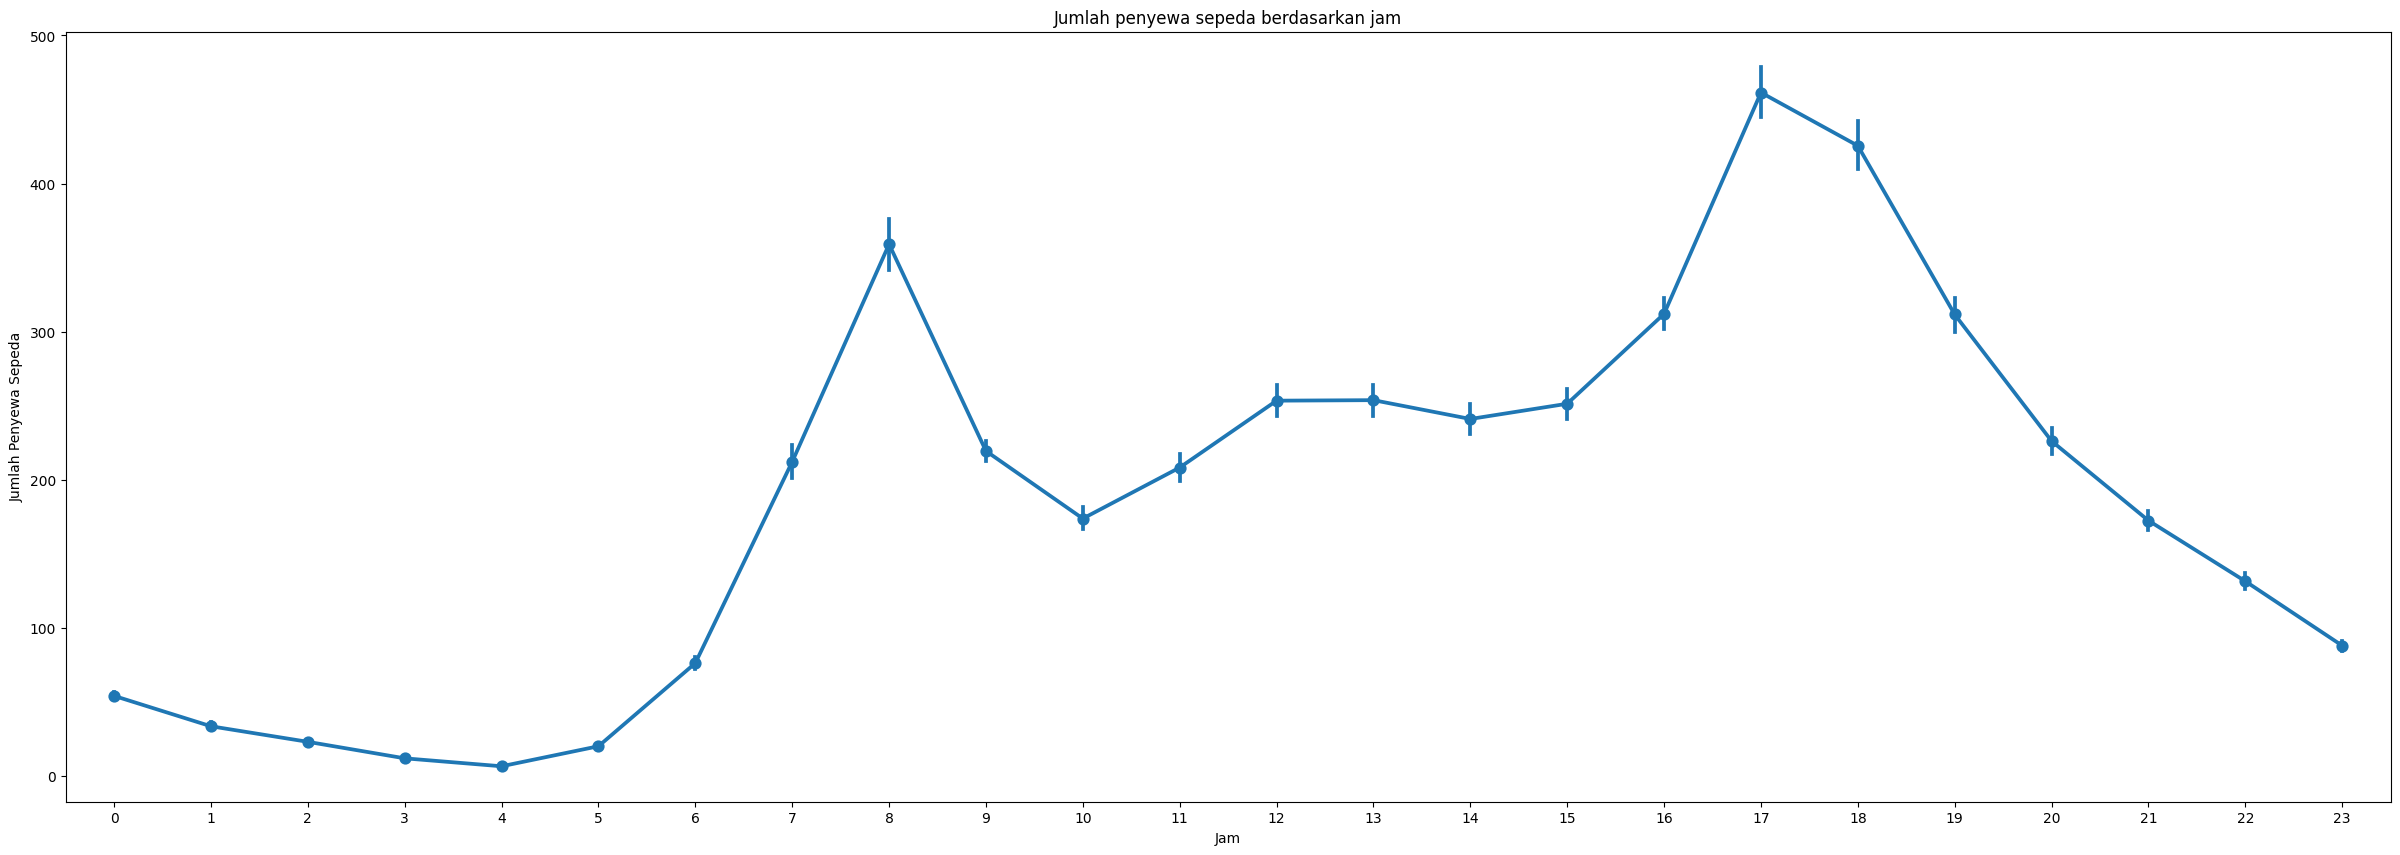

In [40]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'count',]],
              x='hour',
              y='count',
              ax=ax)
plt.title('Jumlah penyewa sepeda berdasarkan jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa Sepeda')

Berdasarkan visualisai data menggunakan line plot dapat dilihat bahwa pada jam 8 pagi lumayan banyak yang menyewa sepeda kemudian di tengah hari mulai menurun dan jumlah penyewa mengalami puncak pada jam 5 sore, semakin jam bertambah maka jumlah penyewa sepeda pun berkurang juga sampai jam 4 pagi dimana merupakan jumlah terendahnya. jadi bisa disimpulkan ada kaitannya waktu dengan jumlah penyewa sepeda

### Pertanyaan 2: Pada bulan apa jumlah penyewa sepeda tertinggi dan terendah?

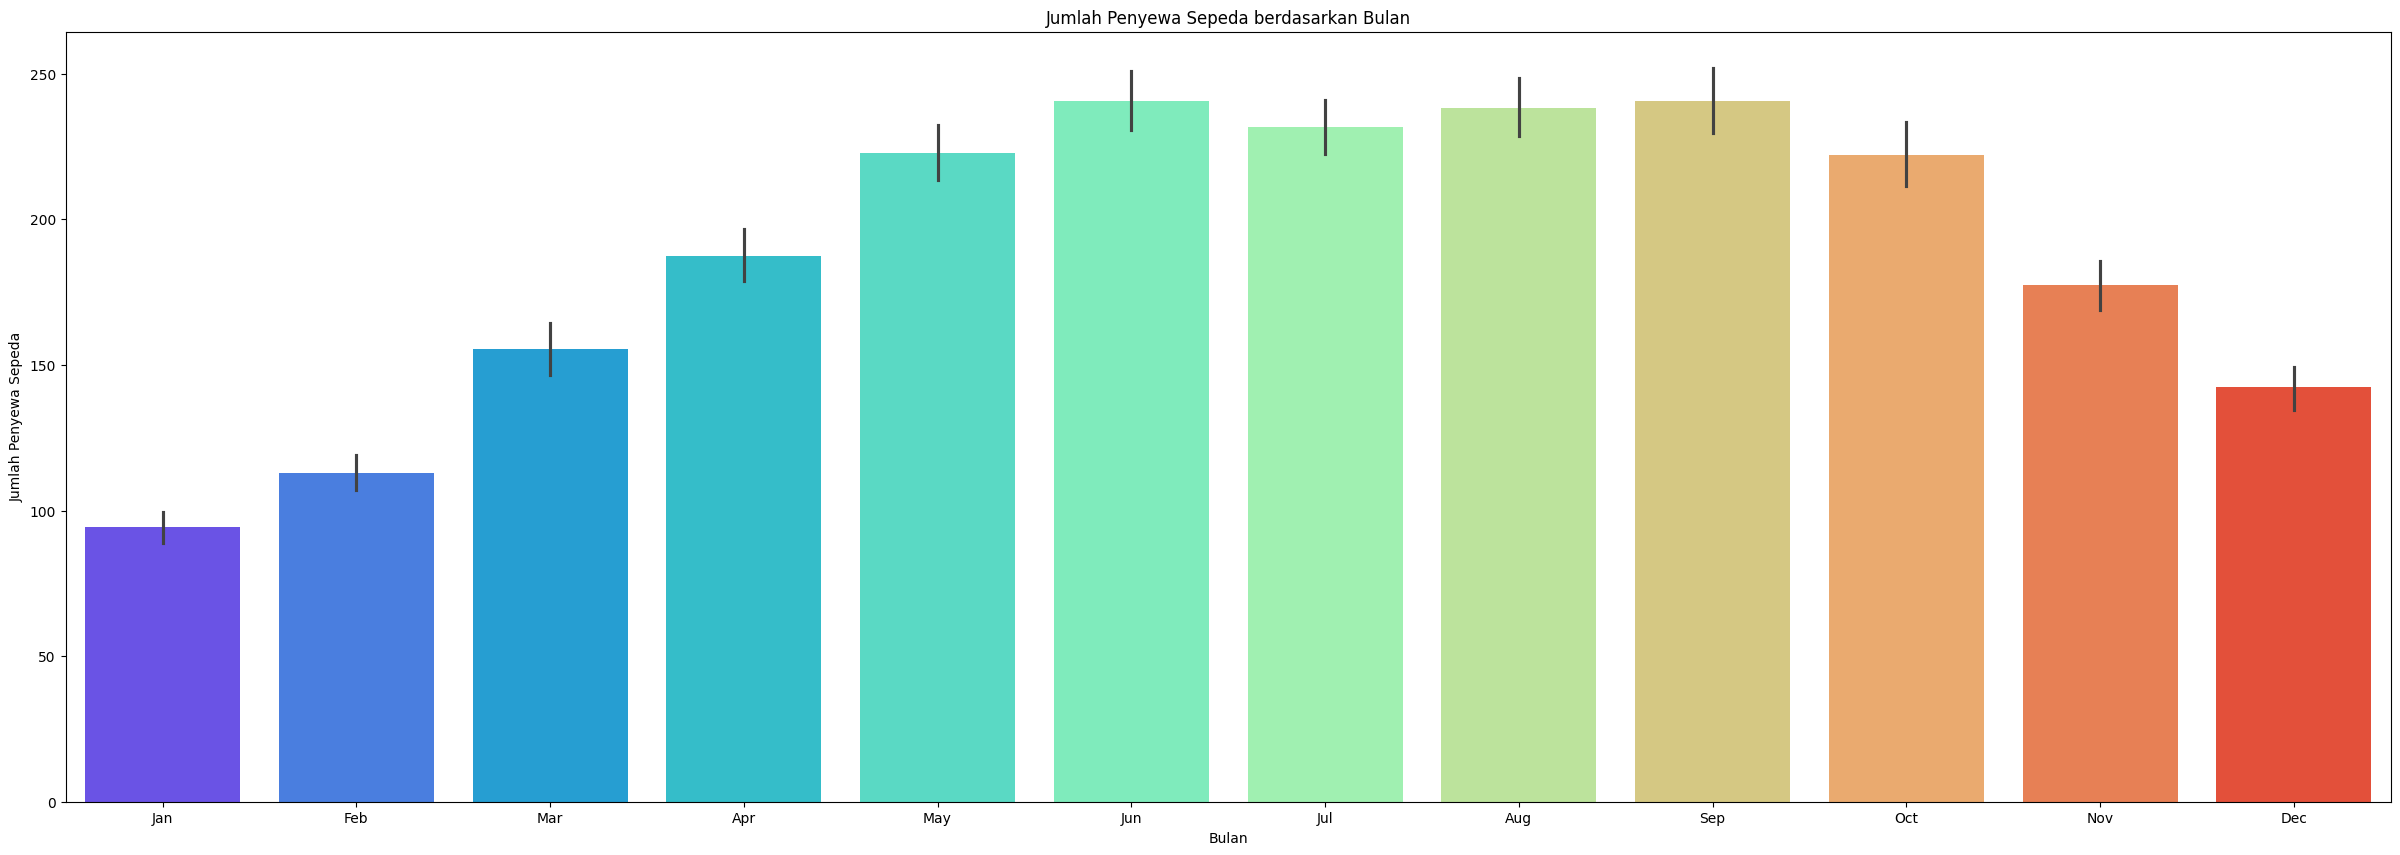

In [32]:
hour_df['month'] = pd.Categorical(hour_df['month'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

sns.barplot(
    x='month',
    y='count',
    data=hour_df,
    palette='rainbow')

plt.title('Jumlah Penyewa Sepeda berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

Dapat dilihat dari hasil visualisasi dengan bar plot diatas terjadi kenaikan jumlah penyewa sepeda mulai dari januari hingga puncaknya pada bulan juni kemudian dari juli sampai september tergolong stabil diatas kemudian mengalami penurunan pada oktober hingga desember. Dari pertanyaan diatas jumlah penyewa sepeda tertinggi terjadi pada bulan juni sedangkan terendah pada bulan januari.

### Pertanyaan 3: Apakah musim memengaruhi jumlah penyewa sepeda pada setiap jamnya?

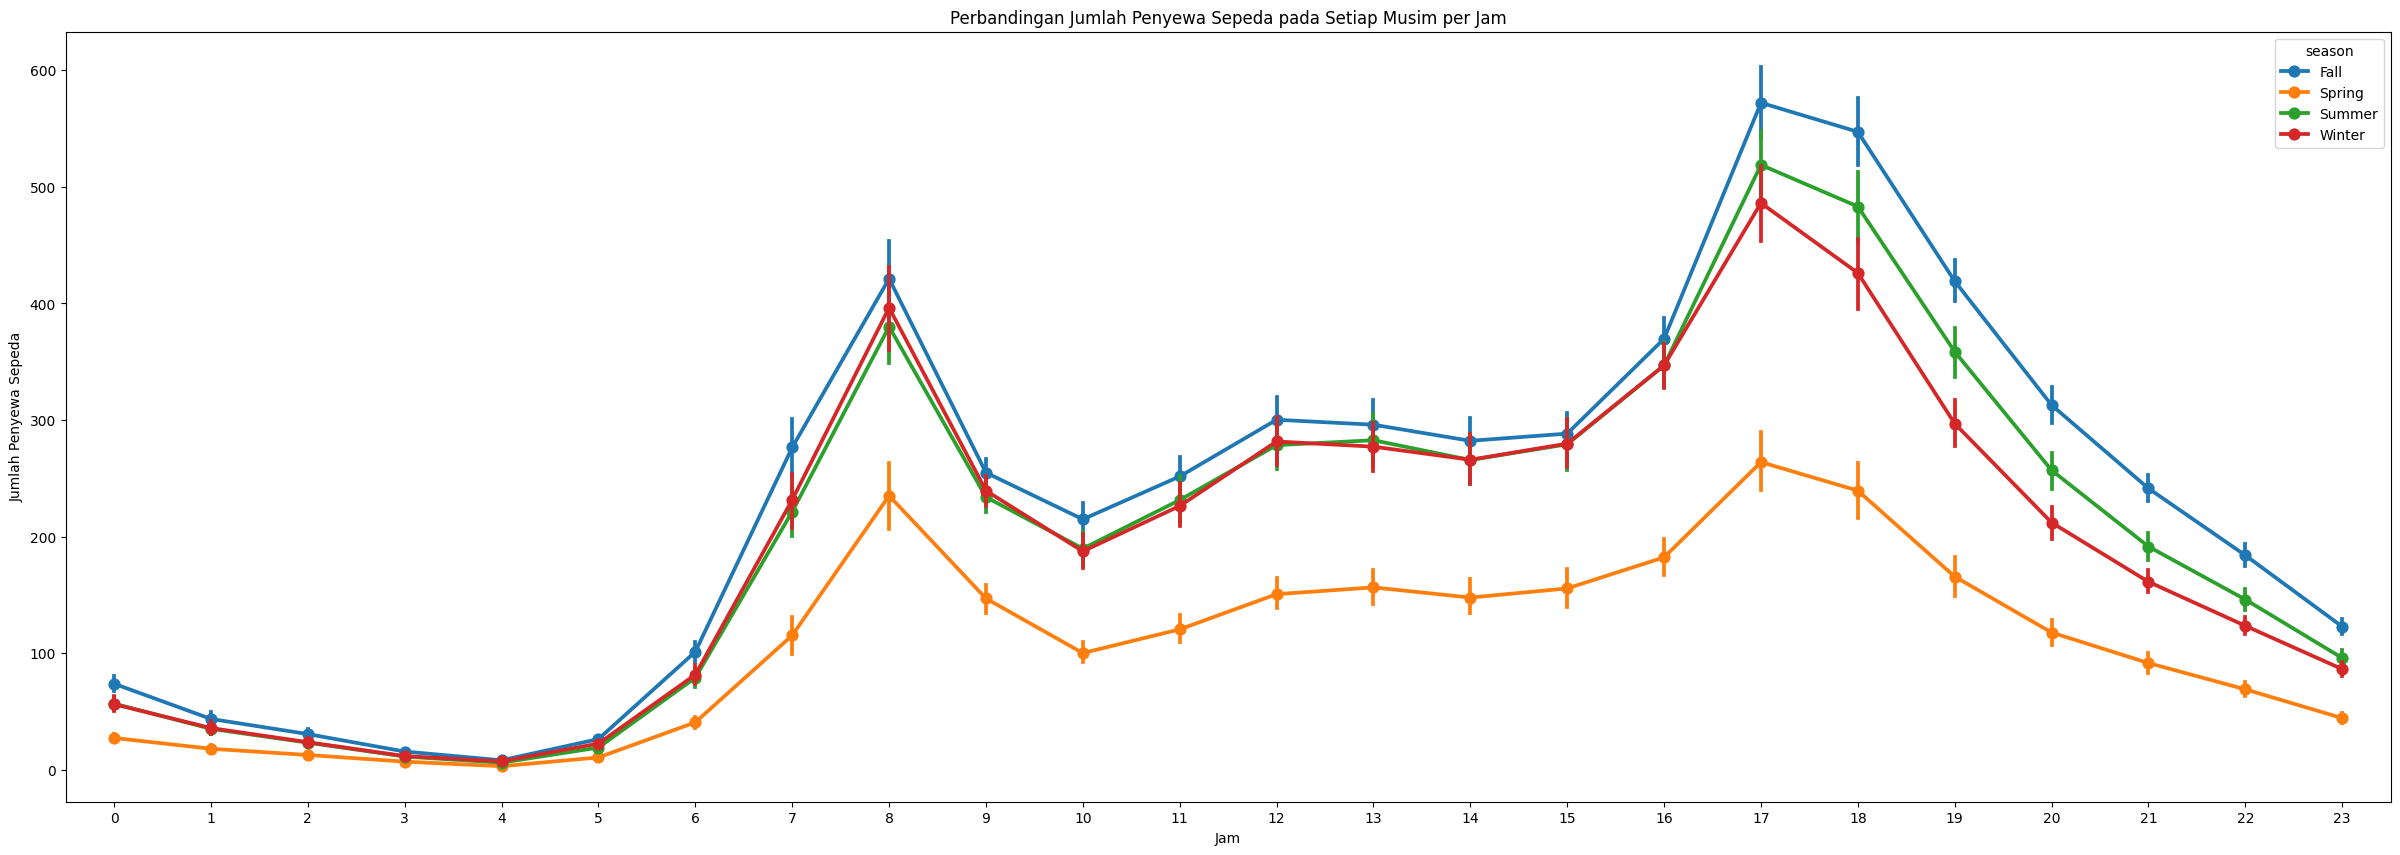

In [39]:
fig,ax = plt.subplots()
sns.pointplot(data=hour_df[['hour',
                           'count',
                           'season']],
              x='hour',
              y='count',
              hue='season',
              ax=ax)
plt.title('Perbandingan Jumlah Penyewa Sepeda pada Setiap Musim per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

Berdasarkan visualisasi data diatas dengan line plot pada keempat musim dapat jelas dilihat bahwa musim gugur(fall) memiliki jumlah penyewa sepeda tertinggi sedangkan musim semi(spring) memiliki jumlah penyewa sepeda terendah. Jam tidak begitu memengaruhi jumlah penyewa pada setiap musimnya karena dapat dilihat polanya sama seperti grafik "jumlah penyewa berdasarkan jam" hanya beda kuantitas penyewa sepedanya pada setiap musimnya saja.

### Pertanyaan 4: Apakah terjadi peningkatan atau penurunan jumlah penyewa sepeda antara tahun 2011 dan 2012?

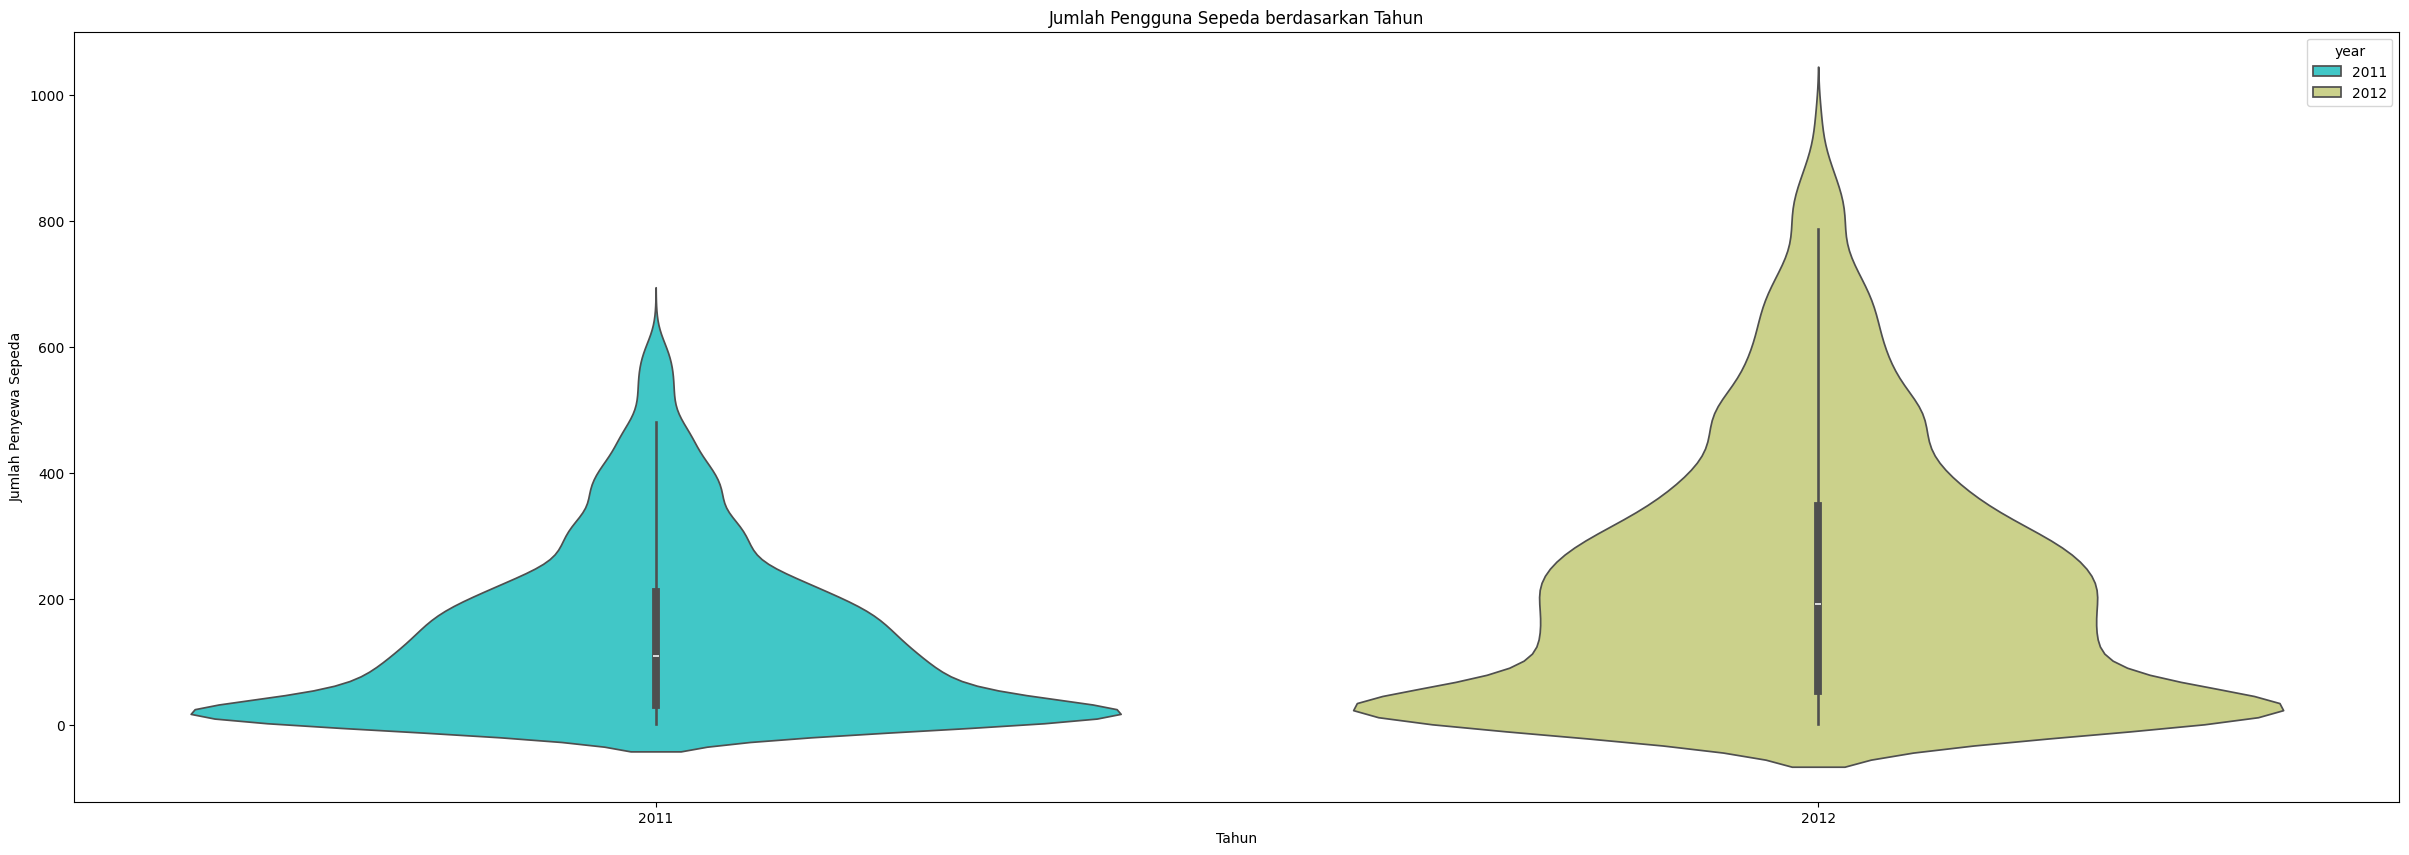

In [34]:
fig,ax = plt.subplots()
sns.violinplot(data=hour_df[['year', 'count']],
               x='year',
               y='count',
               hue='year',  
               ax=ax,
               palette='rainbow')  
plt.title('Jumlah Pengguna Sepeda berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()
plt.show()

Berdasarkan violin plot diatas, dapat dilihat bahwa jumlah penyewa sepeda mengalami peningkatan yang signifikan dari tahun 2011 ke 2012. Hal ini menunjukkan adanya tren positif dalam permintaan penyewaan sepeda selama periode tersebut.

### Pertanyaan 5: Bagaimana kondisi jumlah penyewa sepeda pada weekday?

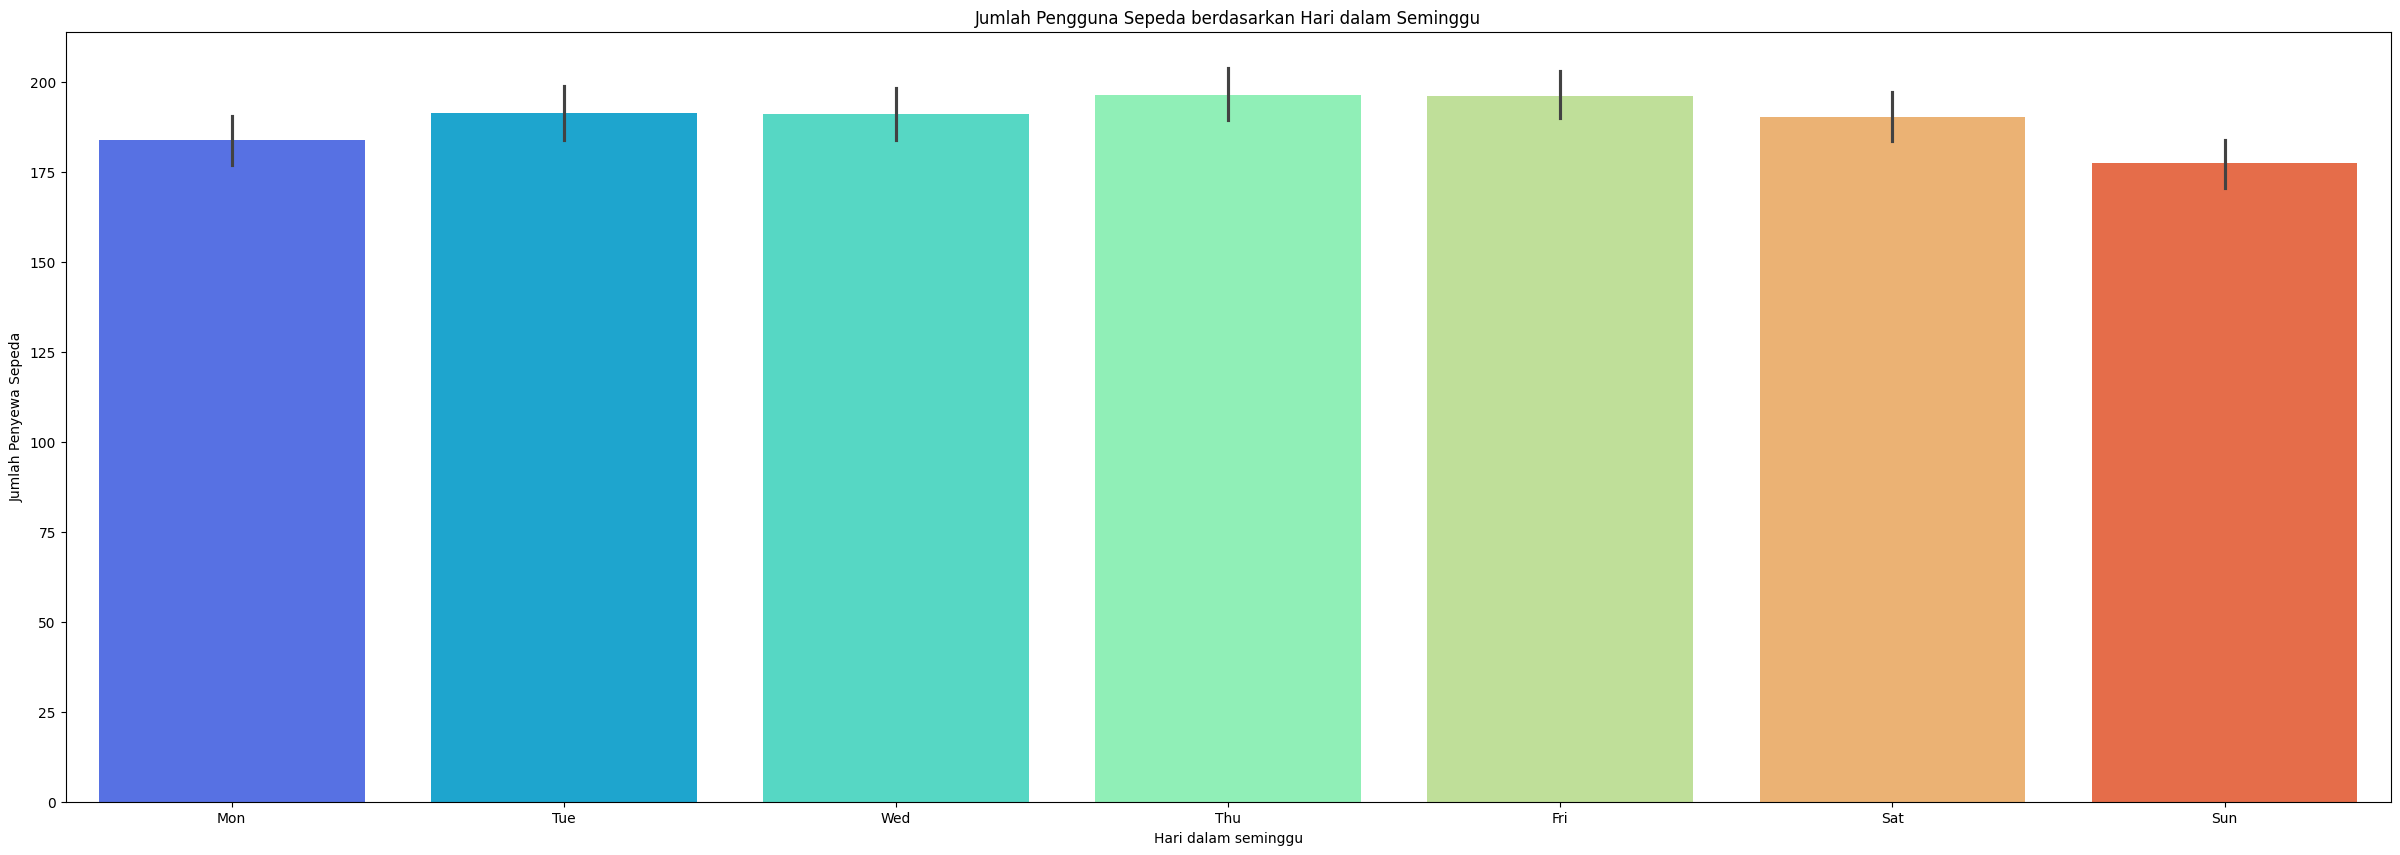

In [35]:
hour_df['weekday'] = pd.Categorical(hour_df['weekday'], categories=
    ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
    ordered=True)

plt.figure()
sns.barplot(
    x='weekday',
    y='count',
    data=hour_df,
    palette='rainbow')

plt.title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam seminggu')
plt.ylabel('Jumlah Penyewa Sepeda')
plt.show()

Berdasarkan Bar plot diatas jumlah penyewa sepeda pada hari jumat dengan jumlah penyewa sepeda terbanyak, dan hari minggu berada pada posisi terakhir pada jumlah penyewaan sepeda.

### Korelasi

<Axes: >

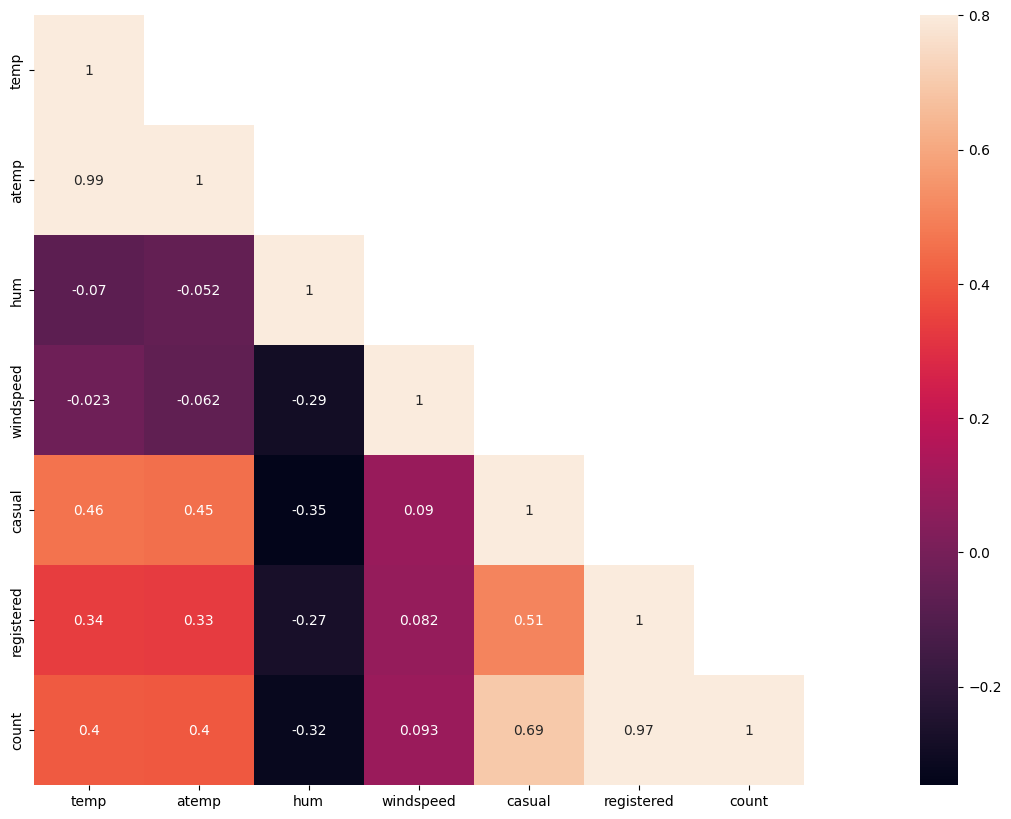

In [36]:
corrMatt = hour_df[['temp',
                    'atemp', 
                    'hum', 
                    'windspeed', 
                    'casual', 
                    'registered', 
                    'count']].corr()

mask = np.array(corrMatt)

mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

- Dapat dilihat bahwa temp sangat berkolerasi dengan atemp sebesar (0.99)
- Dapat dilihat bahwa humidity berkorelasi negatif terhadap semua kategori
- Windspeed juga tidak terlalu berpengaruh karena memiliki nilai mendekati 0 terhadap semua kategori

## Conclusion

- Conclution pertanyaan 1: Setelah melakukan analisis visual terhadap data, dapat disimpulkan bahwa waktu berpengaruh signifikan terhadap jumlah penyewa sepeda. Pada pukul 8 pagi, terjadi lonjakan penyewaan sepeda yang cukup signifikan, hal ini dapat dijelaskan oleh fakta bahwa pukul 8 pagi merupakan waktu awal di mana orang-orang memulai aktivitas harian mereka. Rata-rata jumlah penyewa sepeda pada pukul 8 pagi adalah sebesar 359.01.
Selanjutnya, terjadi penurunan jumlah penyewa pada pukul 10 pagi, yang mungkin disebabkan oleh aktivitas yang dilakukan kebanyakan di dalam ruangan pada waktu tersebut. Namun, mulai pukul 16 hingga pukul 17, terjadi peningkatan signifikan dalam jumlah penyewa sepeda, mencapai puncaknya pada pukul 17 dengan rata-rata sebesar 461.45. Waktu ini mungkin merupakan waktu di mana orang-orang mulai pulang ke tempat tinggal mereka setelah bekerja atau sekolah. Setelah pukul 17, terjadi penurunan secara bertahap dalam jumlah penyewa sepeda, yang dapat dijelaskan oleh kedatangan orang-orang di tempat tinggal mereka. Grafik terus menurun hingga mencapai pukul 23. Dengan demikian, dapat disimpulkan bahwa waktu memiliki peran penting dalam menentukan jumlah penyewa sepeda, dengan pola yang jelas sesuai dengan aktivitas harian masyarakat.

- Conclution pertanyaan 2: Setelah mengamati dan menganalisis data, terlihat bahwa jumlah penyewaan sepeda mengalami fluktuasi yang signifikan sepanjang tahun. Pada bulan Juni, tercatat penyewaan sepeda tertinggi, sementara pada bulan Januari terjadi penyewaan sepeda terendah. Namun, perlu dicatat bahwa terjadi kenaikan yang konsisten dari bulan Januari ke bulan Juni, yang mencapai puncaknya pada bulan tersebut. Setelah mencapai puncak, terjadi periode kestabilan di mana jumlah penyewaan sepeda tetap relatif tinggi, namun tidak mengalami lonjakan yang signifikan. Meskipun demikian, dari bulan Oktober terjadi penurunan yang signifikan dalam jumlah penyewaan sepeda. Penurunan ini bisa disebabkan oleh berbagai faktor seperti perubahan cuaca, perubahan musim, atau perubahan dalam perilaku masyarakat. Potensi faktor-faktor ini perlu dipertimbangkan lebih lanjut untuk memahami dinamika di balik penurunan tersebut. Dengan demikian, data menunjukkan bahwa tren penyewaan sepeda cenderung mengikuti pola musiman, dengan lonjakan tertinggi terjadi pada musim tertentu, diikuti oleh periode kestabilan, dan kemudian penurunan menjelang periode lainnya.

- Conclution pertanyaan 3: Berdasarkan visualisasi data dengan menggunakan line plot untuk setiap musim, dapat diamati bahwa musim gugur (fall) menunjukkan jumlah penyewa sepeda tertinggi, sedangkan musim semi (spring) memiliki jumlah penyewa sepeda terendah. Grafik tersebut menggambarkan perbedaan yang signifikan dalam jumlah penyewa sepeda antara musim-musim tersebut.  saat melihat pola penyewaan sepeda pada setiap jam dalam sehari, terlihat bahwa pola tersebut relatif serupa di setiap musim. Dengan demikian, dapat disimpulkan bahwa meskipun musim memengaruhi jumlah penyewa sepeda secara keseluruhan, pola harian dalam permintaan tersebut cenderung konsisten di setiap musim, menunjukkan bahwa faktor waktu memiliki pengaruh yang lebih kuat daripada musim dalam menentukan pola harian penyewaan sepeda.

- Conclution pertanyaan 4: Berdasarkan analisis violin plot, terlihat bahwa terjadi peningkatan yang signifikan dalam jumlah penyewa sepeda dari tahun 2011 ke tahun 2012. Grafik tersebut menunjukkan distribusi frekuensi penyewaan sepeda untuk setiap tahun dengan lebih jelas. Jumlah penyewa sepeda pada tahun 2012 memiliki distribusi yang lebih merata dan cenderung lebih tinggi daripada pada tahun 2011, yang ditunjukkan oleh bentuk violin plot yang lebih lebar dan tinggi. Peningkatan ini mengindikasikan adanya tren positif dalam permintaan penyewaan sepeda selama periode tersebut.

- Conclution pertanyaan 5: Berdasarkan analisis dari bar plot yang disajikan, dapat diamati bahwa terdapat variasi dalam jumlah penyewa sepeda berdasarkan hari dalam seminggu. Hari Jumat menunjukkan jumlah penyewaan sepeda yang paling tinggi, sementara Hari Minggu menempati posisi terakhir dalam hal jumlah penyewaan. Peningkatan jumlah penyewa sepeda pada Hari Jumat mungkin disebabkan oleh berbagai faktor, seperti orang-orang yang menggunakan sepeda sebagai sarana transportasi untuk bepergian ke tempat kerja atau untuk rekreasi di akhir pekan. Di sisi lain, penurunan jumlah penyewaan sepeda pada Hari Minggu bisa terjadi karena adanya kecenderungan orang-orang untuk beraktivitas di dalam rumah, liburan, atau mungkin preferensi untuk menggunakan sarana transportasi yang berbeda.